# 6.5. Clustering

Contents

1. Import Libraries
2. Import Dataframe
3. Consistency Check
4. Discovering optimal clustering(elbow technique)
5. Charting the clusters on scatterplots
6. Comments on Kmeans clustering results
7. Final Thought

# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

# 02. Import Dataframe

In [2]:
# create path to folder
path = r"C:\Users\mngun\OneDrive\Desktop\Data Analysis\Data Immersion\Achievement 6\Life Expectancy"

# import dataframe
df_life = pd.read_pickle(os.path.join(path,'02_Data','Prepared Data','df_life_corr.pkl'))

# 03. Consistency Check

In [3]:
# confirming shape of dataframe
df_life.shape

(1904, 18)

In [4]:
# checking columns
df_life.head(15)

,Country,Year,Continent,Least Developed,life_expect,Population,CO2_emiss,health_spend,Electric_consumption,forest_area,gdp_per_capita,internet_usage,military_spend,open_defecation,drinking_water_services,adult_obesity,beer_consumption,Expected Age
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431,High
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995,High
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697,High
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830,High
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617,Advanced
5,Albania,2005,Europe,False,75.228,3011487,1.338209,6.335542,1797.525487,28.309672,5865.301904,6.043891,1.350005,0.623198,89.021188,15.6,1.65180,Advanced
6,Albania,2006,Europe,False,75.423,2992547,1.339996,6.009277,1722.072850,28.356277,6566.572828,9.609991,1.567769,0.571935,89.519132,16.2,1.79330,Advanced
7,Albania,2007,Europe,False,75.646,2970017,1.393931,6.316834,1218.360146,28.402883,7283.342638,15.036115,1.820765,0.521500,90.004187,16.9,1.94369,Advanced
8,Albania,2008,Europe,False,75.912,2947314,1.384311,5.139062,1213.124369,28.449489,8228.348041,23.860000,1.984869,0.471903,90.476151,17.5,2.12835,Advanced
9,Albania,2009,Europe,False,76.221,2927519,1.441494,4.602225,1617.744156,28.496095,8813.029461,41.200000,1.517217,0.423170,90.934413,18.1,2.20543,Advanced


In [5]:
df_life.isnull().sum()

Country                    0
Year                       0
Continent                  0
Least Developed            0
life_expect                0
Population                 0
CO2_emiss                  0
health_spend               0
Electric_consumption       0
forest_area                0
gdp_per_capita             0
internet_usage             0
military_spend             0
open_defecation            0
drinking_water_services    0
adult_obesity              0
beer_consumption           0
Expected Age               0
dtype: int64

In [6]:
# creating a dataframe for only selected numerical columns/variables - better clustering
df_numeric = df_life[['life_expect','Electric_consumption','gdp_per_capita','internet_usage','open_defecation','drinking_water_services','adult_obesity']]

# 04. Standardisation of Data

In [7]:
# selecting columns for standardisation and clustering
numeric_columns = ['life_expect','Electric_consumption','gdp_per_capita','internet_usage','open_defecation','drinking_water_services','adult_obesity']

In [8]:
scaler = StandardScaler()
# standardisation of values in chosen columns
df_numeric[numeric_columns] = scaler.fit_transform(df_numeric[numeric_columns])

C:\Users\mngun\AppData\Local\Temp\ipykernel_7776\1807602679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric[numeric_columns] = scaler.fit_transform(df_numeric[numeric_columns])


In [9]:
# confirming standardised values in columns
df_numeric.head()

,life_expect,Electric_consumption,gdp_per_capita,internet_usage,open_defecation,drinking_water_services,adult_obesity
0,0.369703,-0.523873,-0.734253,-1.066846,-0.497022,-0.004663,-0.415698
1,0.408939,-0.516186,-0.711620,-1.059222,-0.500046,0.003837,-0.354806
2,0.443227,-0.537838,-0.692953,-1.056907,-0.503187,0.034952,-0.281735
3,0.472566,-0.487911,-0.675483,-1.035952,-0.506283,0.065384,-0.220843
4,0.497428,-0.511870,-0.653420,-0.983785,-0.509333,0.095124,-0.147772


# 05. Discovering optimal clustering (elbow technique)

In [10]:
# stipulates the number of clusters to be used/ looked for 
num_cl = range(1,10)
# tries to find the best KMeans model for the number of clusters stipulated for each iteration
kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [11]:
# creates a score list, which has scored every number of cluster in KMeans model
score = [kmeans[i].set_params(n_init=10).fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]
# print list of scores for each iteration of KMean
score

[-13328.0,
 -7218.374889282715,
 -4692.578537120969,
 -3841.98441778645,
 -3297.1322190529727,
 -2851.211138802483,
 -2590.716487384616,
 -2358.2306343914574,
 -2210.077549009087]

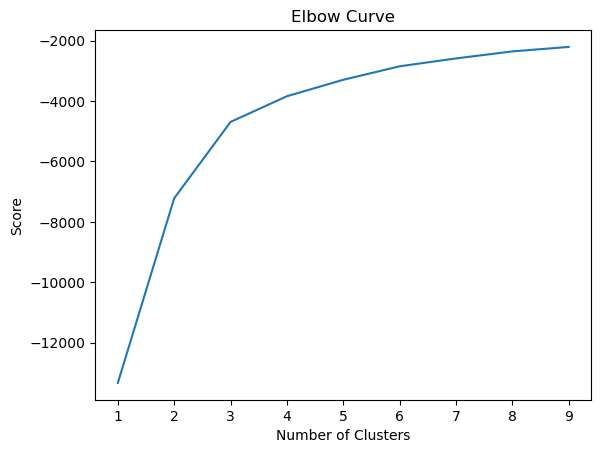

In [12]:
# plots the scores for each iteration, with varying number of clusters
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

I have chosen to use 3 clusters, because thereafter, the score increases at an insignificant rate. 

In [13]:
# create kmeans object
kmeans = KMeans(n_clusters=3)

In [14]:
kmeans.fit(df_numeric)

C:\Users\mngun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [15]:
df_numeric['cluster'] = kmeans.fit_predict(df_numeric)

C:\Users\mngun\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mngun\AppData\Local\Temp\ipykernel_7776\2572733152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['cluster'] = kmeans.fit_predict(df_numeric)


In [16]:
# confirm that the cluster column was created and populated
df_numeric.head()

,life_expect,Electric_consumption,gdp_per_capita,internet_usage,open_defecation,drinking_water_services,adult_obesity,cluster
0,0.369703,-0.523873,-0.734253,-1.066846,-0.497022,-0.004663,-0.415698,0
1,0.408939,-0.516186,-0.711620,-1.059222,-0.500046,0.003837,-0.354806,0
2,0.443227,-0.537838,-0.692953,-1.056907,-0.503187,0.034952,-0.281735,0
3,0.472566,-0.487911,-0.675483,-1.035952,-0.506283,0.065384,-0.220843,0
4,0.497428,-0.511870,-0.653420,-0.983785,-0.509333,0.095124,-0.147772,0


In [17]:
# counting the frequency of clusters
df_numeric['cluster'].value_counts()

cluster
0    972
2    490
1    442
Name: count, dtype: int64

# 05. Charting the Clusters on scatterplots

Figure 1. Drinking Water Services & Life Expectancy

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


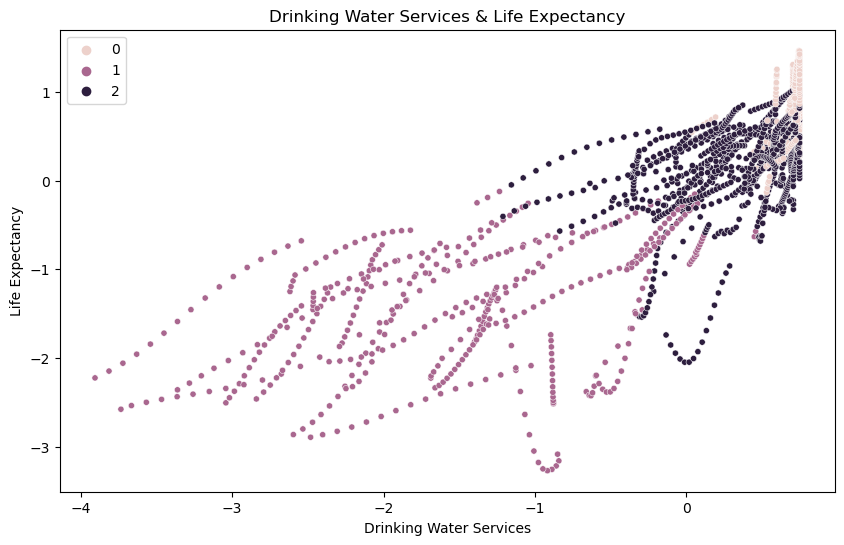

In [25]:
# chart scatterplot for drinking water services and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['drinking_water_services'], y=df_numeric['life_expect'], hue=kmeans.labels_, s=20)
plt.title('Drinking Water Services & Life Expectancy')
plt.xlabel('Drinking Water Services')
plt.ylabel('Life Expectancy')
ax.grid(False)
plt.show()

Figure 2. Electric Consumption & Life Expectancy

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


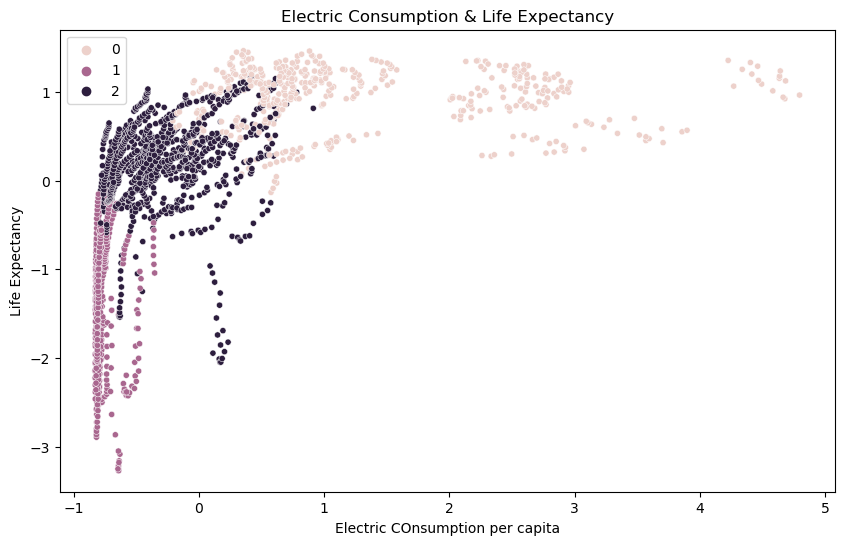

In [26]:
# chart scatterplot for electric_consumption and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['Electric_consumption'], y=df_numeric['life_expect'], hue=kmeans.labels_, s=20)
plt.title('Electric Consumption & Life Expectancy')
plt.xlabel('Electric COnsumption per capita')
plt.ylabel('Life Expectancy')
ax.grid(False)
plt.show()

Figure 3. Internet Usage & Life Expectancy

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Life Expectancy')

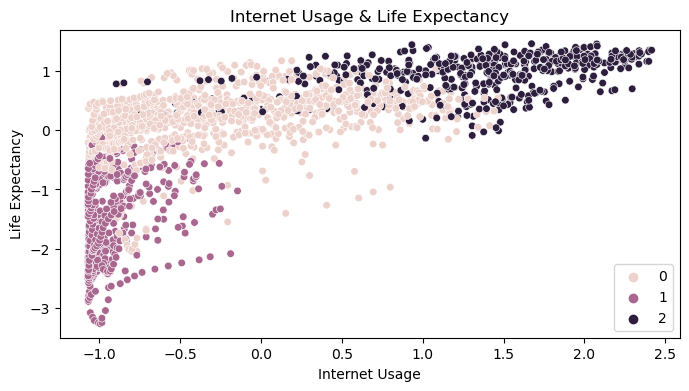

In [20]:
# chart scatterplot for internet_usage and life_expect
plt.figure(figsize=(8,4))
ax = sns.scatterplot(x=df_numeric['internet_usage'], y=df_numeric['life_expect'], hue= kmeans.labels_, s=30)
plt.title('Internet Usage & Life Expectancy')
plt.xlabel('Internet Usage')
plt.ylabel('Life Expectancy')


Figure 4. GDP per capita and Life expectancy

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


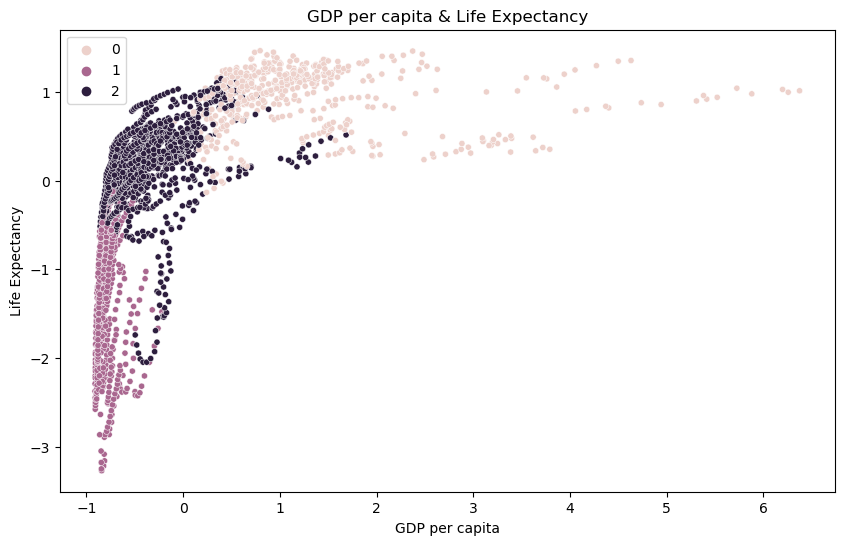

In [28]:
# chart scatterplot for gdp per capita and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['gdp_per_capita'], y=df_numeric['life_expect'], hue=kmeans.labels_, s=20)
plt.title('GDP per capita & Life Expectancy')
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
ax.grid(False)
plt.show()

Figure 5. Open defecation & Life expectancy

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


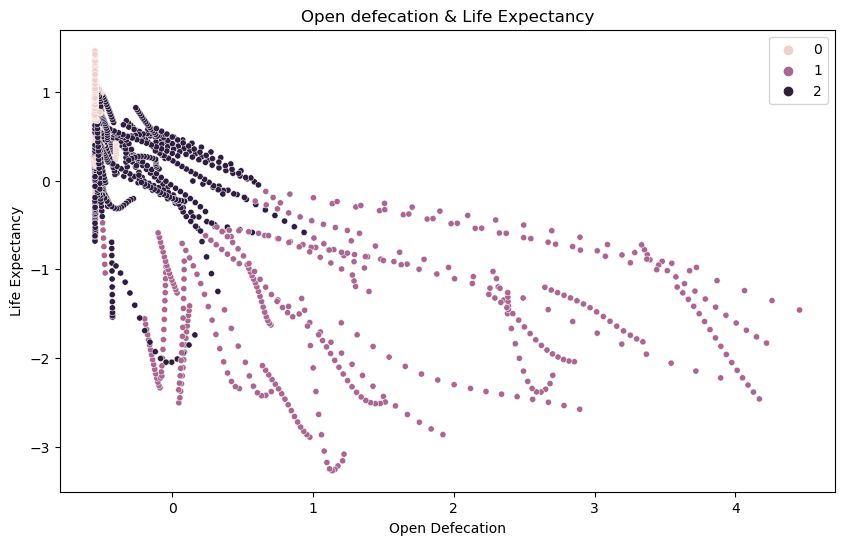

In [29]:
# chart scatterplot for open defecation and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['open_defecation'], y=df_numeric['life_expect'], hue=kmeans.labels_, s=20)
plt.title('Open defecation & Life Expectancy')
plt.xlabel('Open Defecation')
plt.ylabel('Life Expectancy')
ax.grid(False)
plt.show()

Figure 6. Adult Obesity & LIfe Expectancy

C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mngun\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


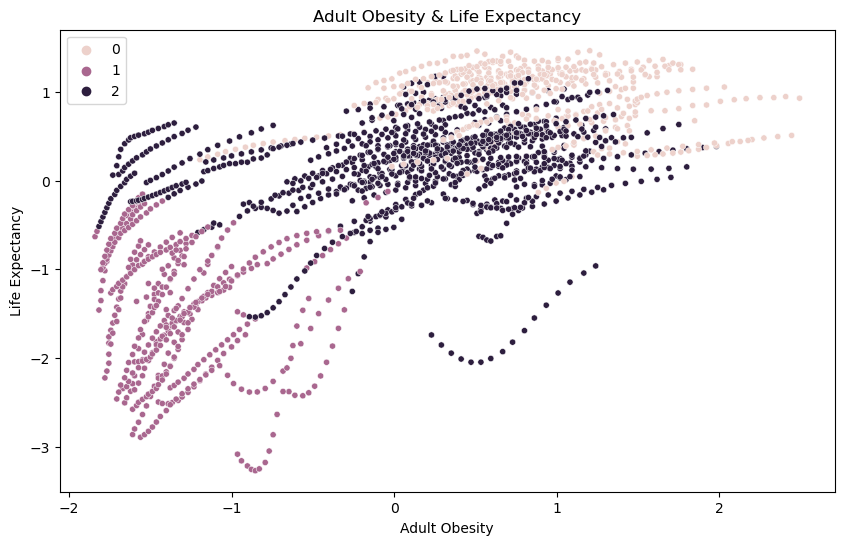

In [30]:
# chart scatterplot for adult obesity and life_expect
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=df_numeric['adult_obesity'], y=df_numeric['life_expect'], hue=kmeans.labels_, s=20)
plt.title('Adult Obesity & Life Expectancy')
plt.xlabel('Adult Obesity')
plt.ylabel('Life Expectancy')
ax.grid(False)
plt.show()

# 06. Comments on Kmeans clustering results

1) Drinking Water Services & Life Expectancy:

There is a great deal of variance at low levels of 'drinking water services', but when approaching 100% for this variable, 
we see that the highest life expectancies exist here. Further analysis needs to be conducted: Perhaps dataset needs to be        standardised.


2) Electric Power Consumption:

I don't see any new insights being revealed by the clustering as is. I need to look into the clustering, or maybe 
standardise the data.

3) Internet Usage:

The clustering revealed something interesting. The dark purple clusters(2) seem to exhibit a much cleaner linear relationship    between internet usage and life expectancy.It would be intresting to see which countries are in this group and whwther there    is a reason they have a more linear correlation.


In [44]:
# create labels for each cluster that are easily recognised
df_numeric.loc[df_numeric['cluster']== 0, 'clusters']= 'Pink'
df_numeric.loc[df_numeric['cluster']== 1, 'clusters']= 'Purple'
df_numeric.loc[df_numeric['cluster']== 2, 'clusters']= 'Dark Purple'

C:\Users\mngun\AppData\Local\Temp\ipykernel_2872\3417780963.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pink' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_numeric.loc[df_numeric['cluster']==0, 'clusters']= 'Pink'


In [45]:
# grouping the clusters and generating basic stats for them
df_numeric.groupby('clusters').agg({'internet_usage':['mean','median'], 'drinking_water_services':['mean','median'], 'Electric_consumption':['mean','median']})

internet_usage            drinking_water_services             \
                      mean     median                    mean     median   
clusters                                                                   
Dark Purple      23.281286  12.900000               88.103766  94.840893   
Pink             30.507053  21.392366               86.767279  95.185000   
Purple           14.448736   8.011629               85.375194  85.308480   

            Electric_consumption               
                            mean       median  
clusters                                       
Dark Purple          3010.102568   753.682352  
Pink                 3899.758801  2307.547707  
Purple               1390.555104   859.239899

# 07. Final Thought

It would be nice to subject these individual clusters to a regression analysis if possible, and then identify the countries 
which belong to them. There may be a commonality between them, such as Continent or 'Least Developed' flag from the original dataset.

In [19]:
# export df_numeric dataframewith standardised values and clusters
df_numeric.to_csv(os.path.join(path, '02_Data','Prepared Data','df_clusters.csv'))